In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import mplfinance as mpf

In [39]:
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Change_percentage',
       'Shares_traded', 'Turnover_in_crore']

In [143]:
nifty50 = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_50.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftybank = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_BANK.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftyauto = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_AUTO.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftyenergy = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_ENERGY.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftyfinserv = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_FINANCIAL_SERVICES.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftyfmcg = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_FMCG.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftyhealth = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_HEALTHCARE.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftyit = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_IT.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftymetal = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_METAL.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftyog = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_OIL_&_GAS.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftypharma = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_PHARMA.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)
niftyrealty = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_REALTY.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)

In [146]:
nifty50

,Open,High,Low,Close,Change_percentage,Shares_traded,Turnover_in_crore
Date,,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,0.14%,56560411.0,2321.88
2015-01-02,8288.70,8410.60,8288.70,8395.45,1.29%,101887024.0,4715.72
2015-01-05,8407.95,8445.60,8363.90,8378.40,-0.35%,118160545.0,5525.52
2015-01-06,8325.30,8327.85,8111.35,8127.35,-2.38%,172799618.0,8089.19
2015-01-07,8118.65,8151.20,8065.45,8102.10,-0.20%,164075424.0,7464.33
...,...,...,...,...,...,...,...
2025-04-09,22460.30,22468.70,22353.25,22399.15,-0.27%,383822618.0,28996.55
2025-04-11,22695.40,22923.90,22695.40,22828.55,0.59%,402162001.0,33683.60
2025-04-15,23368.35,23368.35,23207.00,23328.55,-0.17%,388321931.0,34216.17


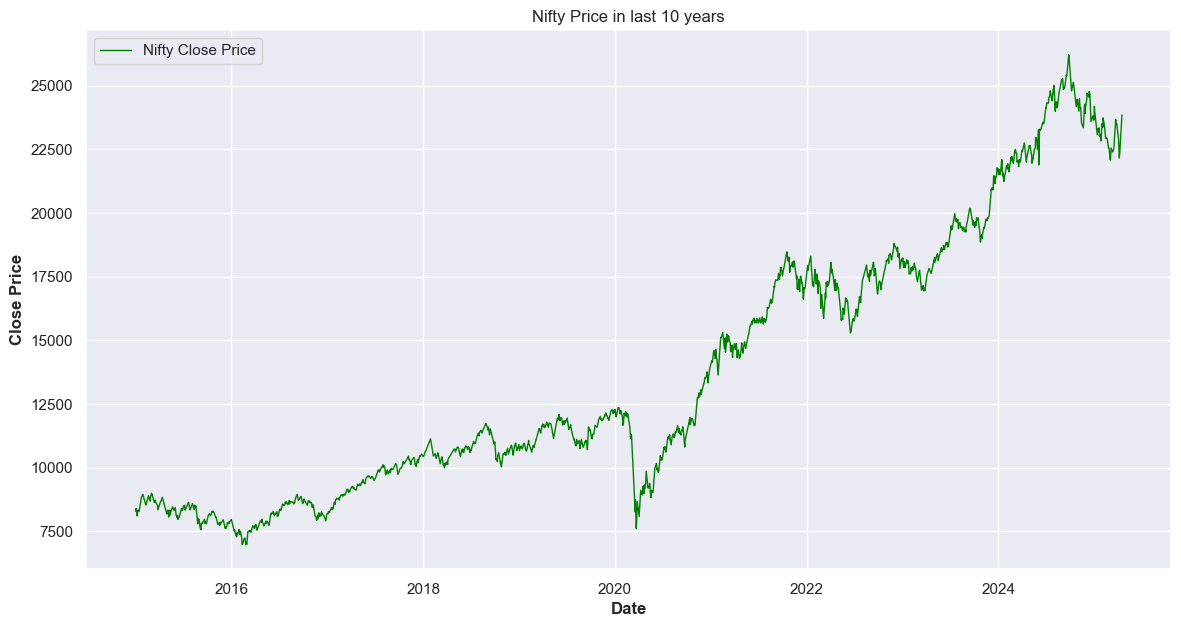

In [120]:
plt.figure(figsize=(14, 7))
plt.plot(nifty50.index, nifty50['Close'], label='Nifty Close Price', color='green', linewidth=1)
plt.title('Nifty Price in last 10 years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
nifty_low = nifty50['Close'].min()
nifty_high = nifty50['Close'].max()

print('Nifty Low:' , nifty_low)
print('Nifty High:' , nifty_high)

nifty_growth = ((nifty_high - nifty_low) / nifty_low) * 100

print(f"\nGrowth:{nifty_growth:.2f}%")

print("\nif you had invest 100,000 Rupees in index mover stocks or index funds at the start of 2015, it would be worth 275,000 approximately ")

Nifty Low: 6970.6
Nifty High: 26216.05

Growth:276.09%

if you had invest 100,000 Rupees in index mover stocks or index funds at the start of 2015, it would be worth 275,000 approximately 


In [46]:
election_dates = [
    pd.Timestamp('2019-05-23'),
    pd.Timestamp('2024-06-04')
]

In [49]:
nifty50.rename(columns={'Open': 'Open', 'High': 'High', 'Low': 'Low', 'Close': 'Close', 'Shares_traded': 'Volume'}, inplace=True)

In [288]:
def get_data_for_period(df, election_date):
    start_date = election_date - pd.DateOffset(months=6)
    end_date = election_date + pd.DateOffset(months=6)
    mask = (df.index >= start_date) & (df.index <= end_date)
    period_data = df.loc[mask]
    return period_data

data_2019 = get_data_for_period(nifty50, election_dates[0])
data_2024 = get_data_for_period(nifty50, election_dates[1])

# data_2024 is empty

In [281]:
#2019 Pre-Election result growth percentage
election_date_2019 = datetime(2019, 5, 23)

pre_2019_first_row = data_2019.iloc[0]
pre_2019_last_row = data_2019.loc[election_date_2019 - pd.DateOffset(days=1)]

pre_2019_first_close = pre_2019_first_row['Close']
pre_2019_last_close = pre_2019_last_row['Close']

pre_2019_trend = ((pre_2019_last_close - pre_2019_first_close) / pre_2019_first_close ) * 100

print(f"Growth 6 months before the 2019 election result: {pre_2019_trend:.2f}%\n")


#2019 Post-Election result growth percentage
election_date_2019 = datetime(2019, 5, 23)
election_date_int = int(election_date_2019.timestamp())

post_2019_first_row = data_2019.loc[election_date_2019 + pd.DateOffset(days=1)]
post_2019_last_row = data_2019.iloc[-1]

post_2019_first_close = post_2019_first_row['Close']
post_2019_last_close = post_2019_last_row['Close']

post_2019_trend = ((post_2019_last_close - post_2019_first_close) / post_2019_first_close ) * 100
print(f"Growth 6 months after the 2019 election result: {post_2019_trend:.2f}%")


Growth 6 months before the 2019 election result: 10.44%

Growth 6 months after the 2019 election result: 0.59%


In [287]:
#2024 Pre-Election result growth percentage
election_date_2024 = datetime(2024, 6, 4)

pre_2024_first_row = data_2024.iloc[0]
pre_2024_last_row = trend_2024.loc[election_date_2024 - pd.DateOffset(days=1)]

IndexError: single positional indexer is out-of-bounds

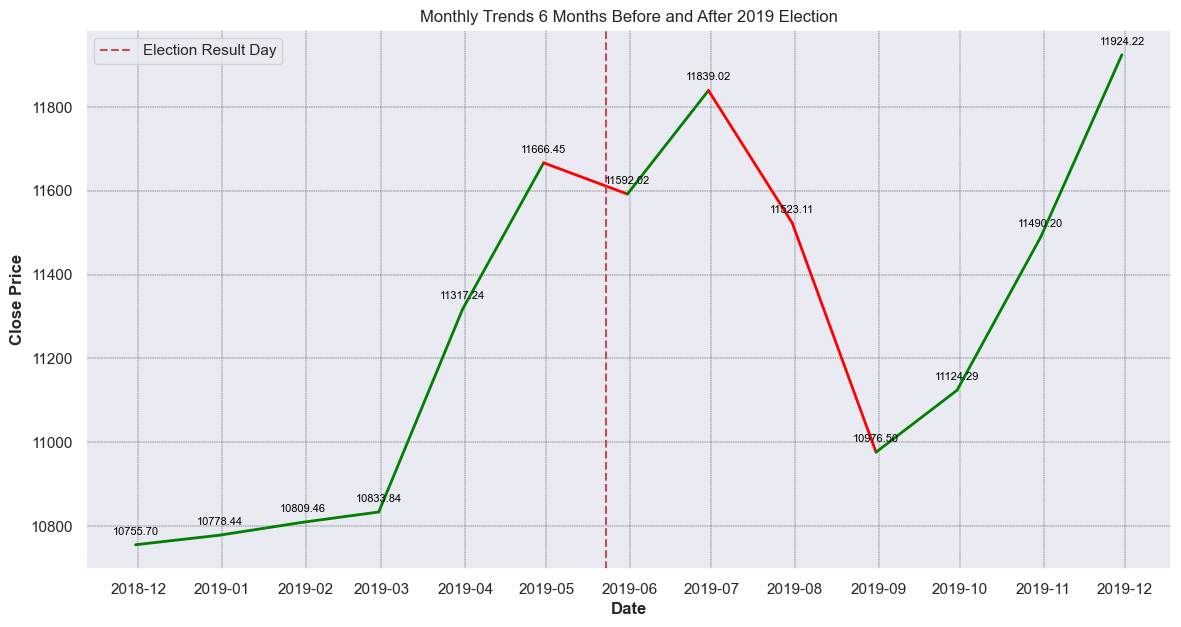

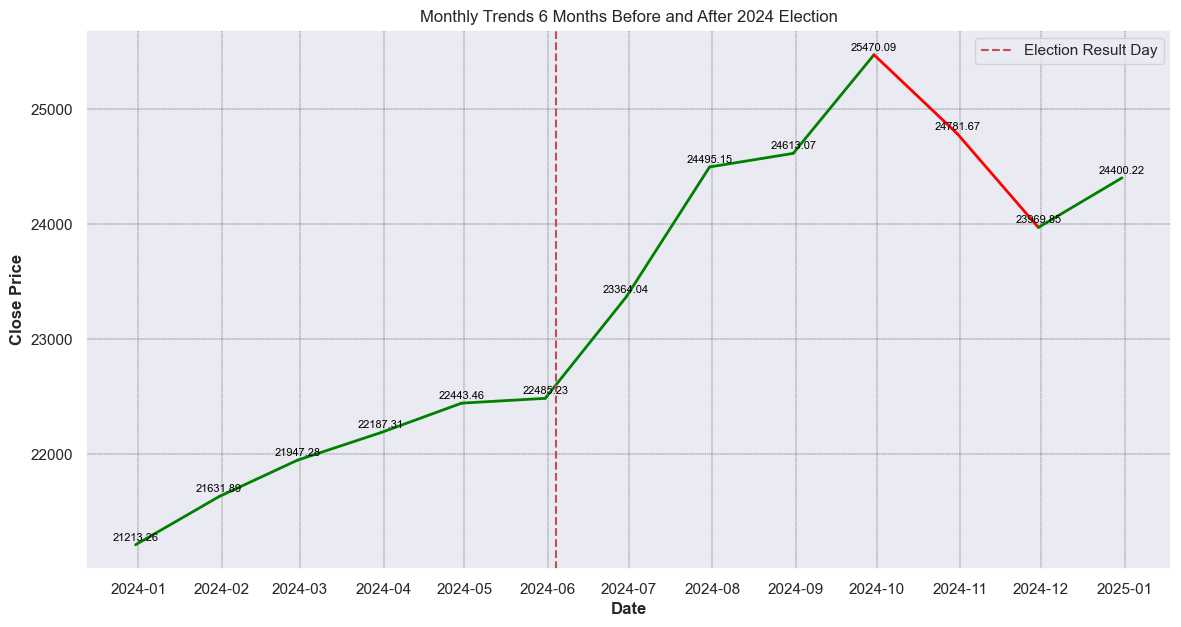

In [278]:
sns.set(style="dark")

def plot_trend_with_colors(trend, election_date, year):
    plt.figure(figsize=(14, 7))
    
    prev_close = None
    
    for i, (date, row) in enumerate(trend.iterrows()):
        if prev_close is not None:
            color = 'green' if row['Close'] >= prev_close else 'red'
            plt.plot([trend.index[i-1], date], [prev_close, row['Close']], color=color, linewidth=2)
        
        plt.text(date, row['Close']+20, f"{row['Close']:.2f}", ha='center', va='bottom', fontsize=8, color='black')
        
        prev_close = row['Close']
    
    plt.axvline(x=election_date, color='r', linestyle='--', label='Election Result Day')
      
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.title(f'Monthly Trends 6 Months Before and After {year} Election')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True, color='k', linestyle='--', linewidth=0.3)
    plt.show()

plot_trend_with_colors(trend_2019, election_dates[0], 2019)
plot_trend_with_colors(trend_2024, election_dates[1], 2024)